# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
pd.set_option('display.max_rows', None)

#SMALL_SIZE = 10
#MEDIUM_SIZE = 15
#LARGE_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
meteorological_data = data[data['Disaster Subgroup'] == 'Meteorological']

# count number of disasters in each year for each subgroup
meteorological_disaster_counts = meteorological_data['Year'].value_counts().sort_index()

# save index of years
meteorological_disaster_counts_index = meteorological_disaster_counts.index

# sum costs by year
meteorological_costs = meteorological_data[['Year', 'Total Damages']]
meteorological_costs = meteorological_costs.groupby('Year').sum()
meteorological_costs = meteorological_costs.squeeze()

# SPLIT METEOROLOGICAL DISASTERS

In [4]:
# display unique types
for dtype in meteorological_data['Disaster Type'].unique():
    print(dtype)

Storm
Extreme temperature


In [5]:
# display unique types
for dtype in meteorological_data['Disaster Subtype'].unique():
    print(dtype)

Tropical cyclone
<NA>
Convective storm
Cold wave
Heat wave
Severe winter conditions
Extra-tropical storm


In [6]:
# create new dataframes for each type
storm_data = meteorological_data[meteorological_data['Disaster Type'] == 'Storm']
extreme_temp_data = meteorological_data[meteorological_data['Disaster Type'] == 'Extreme temperature']
#cold_wave_data = meteorological_data[meteorological_data['Disaster Subtype'] == 'Cold wave']
#heat_wave_data = meteorological_data[meteorological_data['Disaster Subtype'] == 'Heat wave']

# count number of disasters in each year for each subgroup
storm_disaster_counts = storm_data['Year'].value_counts().sort_index()
extreme_temp_disaster_counts = extreme_temp_data['Year'].value_counts().sort_index()
#cold_wave_disaster_counts = cold_wave_data['Year'].value_counts().sort_index()
#heat_wave_disaster_counts = heat_wave_data['Year'].value_counts().sort_index()

# save index of years
storm_disaster_counts_index = storm_disaster_counts.index
extreme_temp_disaster_counts_index = extreme_temp_disaster_counts.index
#cold_wave_disaster_counts_index = cold_wave_disaster_counts.index
#heat_wave_disaster_counts_index = heat_wave_disaster_counts.index

# METEOROLOGICAL DISASTER OCCURRENCE ANALYSIS

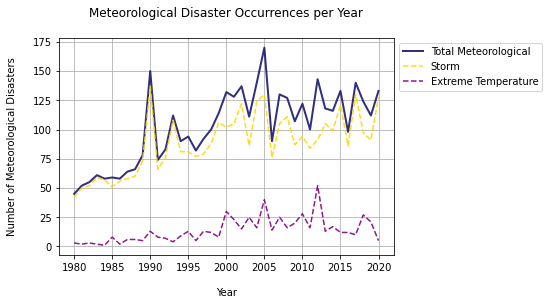

In [7]:
# METEOROLOGICAL DISASTER OCCURRENCE SINGLE LINE PLOT

plt.grid(axis = 'both')
plt.title("Meteorological Disaster Occurrences per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Meteorological Disasters\n")
plt.plot(meteorological_disaster_counts_index,meteorological_disaster_counts, linewidth=2, color = 'midnightblue', alpha = 0.9, label = 'Total Meteorological')
plt.plot(storm_disaster_counts_index, storm_disaster_counts, linestyle = '--', color = 'gold', alpha = 0.9, label = 'Storm')
plt.plot(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, linestyle = '--', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

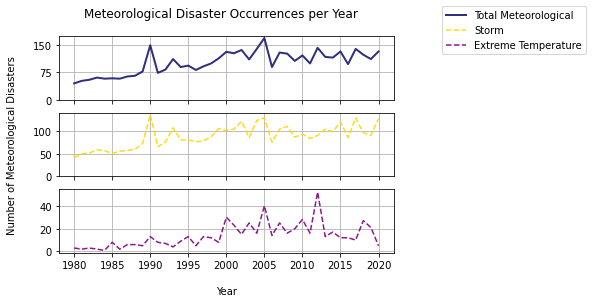

In [8]:
# METEOROLOGICAL DISASTER OCCURRENCE MULTIPLE LINE PLOTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Meteorological Disaster Occurrences per Year\n")
axs[1].set_ylabel("Number of Meteorological Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(meteorological_disaster_counts_index, meteorological_disaster_counts, linewidth=2, color = 'midnightblue', alpha = 0.9, label = 'Total Meteorological')
axs[1].plot(storm_disaster_counts_index, storm_disaster_counts, linestyle = '--', color = 'gold', alpha = 0.9, label = 'Storm')
axs[2].plot(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, linestyle = '--', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

plt.sca(axs[0])
plt.yticks(np.linspace(0,150,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,100,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

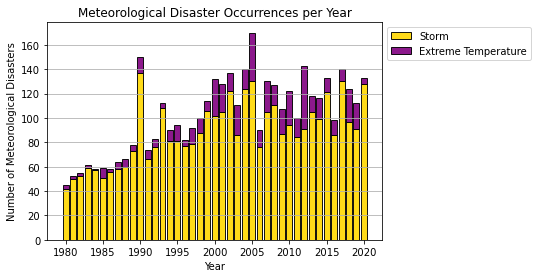

In [9]:
# METEOROLOGICAL DISASTER OCCURRENCE SINGLE BAR CHART

plt.grid(axis = 'y')
plt.title("Meteorological Disaster Occurrences per Year")
plt.xlabel("Year")
plt.ylabel("Number of Meteorological Disasters")

plt.bar(storm_disaster_counts_index, storm_disaster_counts, edgecolor = 'black', color = 'gold', alpha = 0.9, label = 'Storm')
plt.bar(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, bottom = storm_disaster_counts, edgecolor = 'black', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

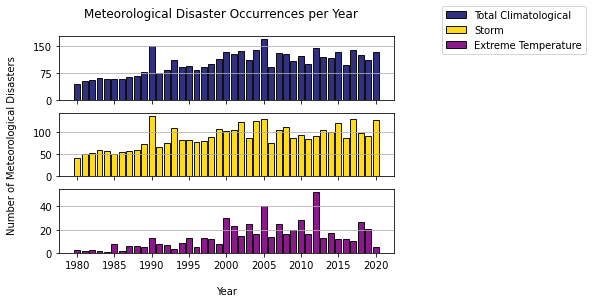

In [10]:
# METEOROLOGICAL DISASTER OCCURRENCE MULTIPLE BAR CHARTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Meteorological Disaster Occurrences per Year\n")
axs[1].set_ylabel("Number of Meteorological Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(meteorological_disaster_counts_index, meteorological_disaster_counts, edgecolor = 'black', color = 'midnightblue', alpha = 0.9, label = 'Total Climatological')
axs[1].bar(storm_disaster_counts_index, storm_disaster_counts, edgecolor = 'black', color = 'gold', alpha = 0.9, label = 'Storm')
axs[2].bar(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, edgecolor = 'black', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

plt.sca(axs[0])
plt.yticks(np.linspace(0,150,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,100,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

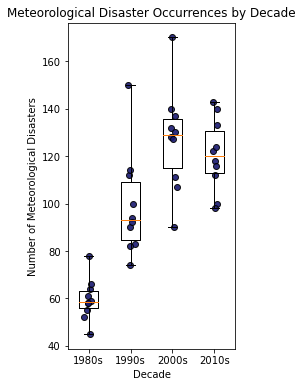

In [11]:
# METEOROLOGICAL DISASTER OCCURRENCE BOXPLOT

total_box_data = [meteorological_disaster_counts[0:10], meteorological_disaster_counts[10:20], meteorological_disaster_counts[20:30], meteorological_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Meteorological Disaster Occurrences by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Meteorological Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearBOX.png", bbox_inches='tight')

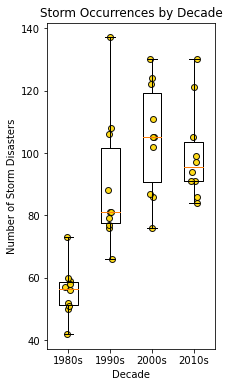

In [12]:
# STORM OCCURRENCE BOXPLOT

total_box_data = [storm_disaster_counts[0:10], storm_disaster_counts[10:20], storm_disaster_counts[20:30], storm_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Storm Occurrences by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Storm Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'gold', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/stormsPerYearBOX.png", bbox_inches='tight')

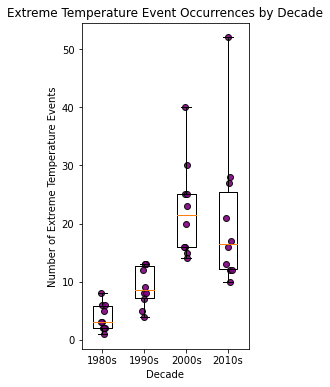

In [13]:
# EXTREME TEMPERATURE OCCURRENCE BOXPLOT

total_box_data = [extreme_temp_disaster_counts[0:10], extreme_temp_disaster_counts[10:20], extreme_temp_disaster_counts[20:30], extreme_temp_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Extreme Temperature Event Occurrences by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Extreme Temperature Events")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'purple', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/extremeTemperatureEventsPerYearBOX.png", bbox_inches='tight')

# METEOROLOGICAL DISASTER OCCURRENCE STATISTICS

In [14]:
# METEOROLOGICAL DISASTER OCCURRENCE STATISTICS

print("METEOROLOGICAL DISASTER OCCURRENCE STATISTICS")

# meteorological disaster occurrence (total statistics)
print("\nMeteorological disaster occurrence (total statistics): ")
print(meteorological_disaster_counts.describe())

# meteorological disaster occurrence (1980s statistics)
print("\nMeteorological disaster occurrence (1980s statistics): ")
print(meteorological_disaster_counts[0:10].describe())

# meteorological disaster occurrence (1990s statistics)
print("\nMeteorological disaster occurrence (1990s statistics): ")
print(meteorological_disaster_counts[10:20].describe())

# meteorological disaster occurrence (2000s statistics)
print("\nMeteorological disaster occurrence (2000s statistics): ")
print(meteorological_disaster_counts[20:30].describe())

# meteorological disaster occurrence (2010s statistics)
print("\nMeteorological disaster occurrence (2010s statistics): ")
print(meteorological_disaster_counts[30:40].describe())

print("\n")

# METEOROLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("METEOROLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of meteorological disasters (1980s-2010s)
meteorological_occurrence_mean_1980s = meteorological_disaster_counts[0:10].mean()
meteorological_occurrence_mean_2010s = meteorological_disaster_counts[30:40].mean()
meteorological_occurrence_mean_percent_change_1980_to_2020 = 100*(meteorological_occurrence_mean_2010s-meteorological_occurrence_mean_1980s)/abs(meteorological_occurrence_mean_1980s)
print("Change in mean yearly number of meteorological disasters (1980s-2010s): {:.2f}%".format(meteorological_occurrence_mean_percent_change_1980_to_2020))

# change in maximum yearly number of meteorological disasters (1980s-2010s)
meteorological_occurrence_max_1980s = meteorological_disaster_counts[0:10].max()
meteorological_occurrence_max_2010s = meteorological_disaster_counts[30:40].max()
meteorological_occurrence_max_percent_change_1980_to_2020 = 100*(meteorological_occurrence_max_2010s-meteorological_occurrence_max_1980s)/abs(meteorological_occurrence_max_1980s)
print("Change in maximum yearly number of meteorological disasters (1980s-2010s): {:.2f}%".format(meteorological_occurrence_max_percent_change_1980_to_2020))

# change in minimum yearly number of meteorological disasters (1980s-2010s)
meteorological_occurrence_min_1980s = meteorological_disaster_counts[0:10].min()
meteorological_occurrence_min_2010s = meteorological_disaster_counts[30:40].min()
meteorological_occurrence_min_percent_change_1980_to_2020 = 100*(meteorological_occurrence_min_2010s-meteorological_occurrence_min_1980s)/abs(meteorological_occurrence_min_1980s)
print("Change in minimum yearly number of meteorological disasters (1980s-2010s): {:.2f}%".format(meteorological_occurrence_min_percent_change_1980_to_2020))

# change in standard deviation of yearly number of meteorological disasters (1980s-2010s)
meteorological_occurrence_std_1980s = meteorological_disaster_counts[0:10].std()
meteorological_occurrence_std_2010s = meteorological_disaster_counts[30:40].std()
meteorological_occurrence_std_percent_change_1980_to_2020 = 100*(meteorological_occurrence_std_2010s-meteorological_occurrence_std_1980s)/abs(meteorological_occurrence_std_1980s)
print("Change in standard deviation of yearly number of meteorological disasters (1980s-2010s): {:.2f}%\n".format(meteorological_occurrence_std_percent_change_1980_to_2020))

METEOROLOGICAL DISASTER OCCURRENCE STATISTICS

Meteorological disaster occurrence (total statistics): 
count     41.000000
mean     102.390244
std       31.664553
min       45.000000
25%       78.000000
50%      107.000000
75%      128.000000
max      170.000000
Name: Year, dtype: float64

Meteorological disaster occurrence (1980s statistics): 
count    10.000000
mean     59.600000
std       8.809086
min      45.000000
25%      55.750000
50%      58.500000
75%      63.250000
max      78.000000
Name: Year, dtype: float64

Meteorological disaster occurrence (1990s statistics): 
count     10.000000
mean      99.100000
std       21.911184
min       74.000000
25%       84.750000
50%       93.000000
75%      109.000000
max      150.000000
Name: Year, dtype: float64

Meteorological disaster occurrence (2000s statistics): 
count     10.000000
mean     127.200000
std       21.544785
min       90.000000
25%      115.000000
50%      129.000000
75%      135.750000
max      170.000000
Name: Year, d

In [15]:
# STORM OCCURRENCE STATISTICS

print("STORM OCCURRENCE STATISTICS")

# storm occurrence (total statistics)
print("\nStorm occurrence (total statistics): ")
print(storm_disaster_counts.describe())

# storm occurrence (1980s statistics)
print("\nStorm occurrence (1980s statistics): ")
print(storm_disaster_counts[0:10].describe())

# storm occurrence (1990s statistics)
print("\nStorm occurrence (1990s statistics): ")
print(storm_disaster_counts[10:20].describe())

# storm occurrence (2000s statistics)
print("\nStorm occurrence (2000s statistics): ")
print(storm_disaster_counts[20:30].describe())

# storm occurrence (2010s statistics)
print("\nStorm occurrence (2010s statistics): ")
print(storm_disaster_counts[30:40].describe())

print("\n")

# STORM OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("STORM OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of storms (1980s-2010s)
storm_occurrence_mean_1980s = storm_disaster_counts[0:10].mean()
storm_occurrence_mean_2010s = storm_disaster_counts[30:40].mean()
storm_occurrence_mean_percent_change_1980_to_2020 = 100*(storm_occurrence_mean_2010s-storm_occurrence_mean_1980s)/abs(storm_occurrence_mean_1980s)
print("Change in mean yearly number of storms (1980s-2010s): {:.2f}%".format(storm_occurrence_mean_percent_change_1980_to_2020))

# change in maximum yearly number of storms (1980s-2010s)
storm_occurrence_max_1980s = storm_disaster_counts[0:10].max()
storm_occurrence_max_2010s = storm_disaster_counts[30:40].max()
storm_occurrence_max_percent_change_1980_to_2020 = 100*(storm_occurrence_max_2010s-storm_occurrence_max_1980s)/abs(storm_occurrence_max_1980s)
print("Change in maximum yearly number of storms (1980s-2010s): {:.2f}%".format(storm_occurrence_max_percent_change_1980_to_2020))

# change in minimum yearly number of storms (1980s-2010s)
storm_occurrence_min_1980s = storm_disaster_counts[0:10].min()
storm_occurrence_min_2010s = storm_disaster_counts[30:40].min()
storm_occurrence_min_percent_change_1980_to_2020 = 100*(storm_occurrence_min_2010s-storm_occurrence_min_1980s)/abs(storm_occurrence_min_1980s)
print("Change in minimum yearly number of storms (1980s-2010s): {:.2f}%".format(storm_occurrence_min_percent_change_1980_to_2020))

# change in standard deviation of yearly number of storms (1980s-2010s)
storm_occurrence_std_1980s = storm_disaster_counts[0:10].std()
storm_occurrence_std_2010s = storm_disaster_counts[30:40].std()
storm_occurrence_std_percent_change_1980_to_2020 = 100*(storm_occurrence_std_2010s-storm_occurrence_std_1980s)/abs(storm_occurrence_std_1980s)
print("Change in standard deviation of yearly number of storms (1980s-2010s): {:.2f}%\n".format(storm_occurrence_std_percent_change_1980_to_2020))

STORM OCCURRENCE STATISTICS

Storm occurrence (total statistics): 
count     41.000000
mean      88.560976
std       25.340727
min       42.000000
25%       73.000000
50%       87.000000
75%      105.000000
max      137.000000
Name: Year, dtype: float64

Storm occurrence (1980s statistics): 
count    10.00000
mean     55.80000
std       8.10761
min      42.00000
25%      51.25000
50%      56.50000
75%      58.75000
max      73.00000
Name: Year, dtype: float64

Storm occurrence (1990s statistics): 
count     10.00000
mean      89.90000
std       21.12634
min       66.00000
25%       77.50000
50%       81.00000
75%      101.50000
max      137.00000
Name: Year, dtype: float64

Storm occurrence (2000s statistics): 
count     10.000000
mean     104.800000
std       17.781389
min       76.000000
25%       90.750000
50%      105.000000
75%      119.250000
max      130.000000
Name: Year, dtype: float64

Storm occurrence (2010s statistics): 
count     10.000000
mean      99.800000
std       15.

In [16]:
# EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICS

print("EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICS")

# extreme temperature event occurrence (total statistics)
print("\nExtreme temperature event occurrence (total statistics): ")
print(extreme_temp_disaster_counts.describe())

# extreme temperature event occurrence (1980s statistics)
print("\nExtreme temperature event occurrence (1980s statistics): ")
print(extreme_temp_disaster_counts[0:10].describe())

# extreme temperature event occurrence (1990s statistics)
print("\nExtreme temperature event occurrence (1990s statistics): ")
print(extreme_temp_disaster_counts[10:20].describe())

# extreme temperature event occurrence (2000s statistics)
print("\nExtreme temperature event occurrence (2000s statistics): ")
print(extreme_temp_disaster_counts[20:30].describe())

# extreme temperature event disaster occurrence (2010s statistics)
print("\nExtreme temperature event occurrence (2010s statistics): ")
print(extreme_temp_disaster_counts[30:40].describe())

print("\n")

# EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of extreme temperature events (1980s-2010s)
extreme_temp_occurrence_mean_1980s = extreme_temp_disaster_counts[0:10].mean()
extreme_temp_occurrence_mean_2010s = extreme_temp_disaster_counts[30:40].mean()
extreme_temp_occurrence_mean_percent_change_1980_to_2020 = 100*(extreme_temp_occurrence_mean_2010s-extreme_temp_occurrence_mean_1980s)/abs(extreme_temp_occurrence_mean_1980s)
print("Change in mean yearly number of extreme temperature events (1980s-2010s): {:.2f}%".format(extreme_temp_occurrence_mean_percent_change_1980_to_2020))

# change in maximum yearly number of extreme temperature events (1980s-2010s)
extreme_temp_occurrence_max_1980s = extreme_temp_disaster_counts[0:10].max()
extreme_temp_occurrence_max_2010s = extreme_temp_disaster_counts[30:40].max()
extreme_temp_occurrence_max_percent_change_1980_to_2020 = 100*(extreme_temp_occurrence_max_2010s-extreme_temp_occurrence_max_1980s)/abs(extreme_temp_occurrence_max_1980s)
print("Change in maximum yearly number of extreme temperature events (1980s-2010s): {:.2f}%".format(extreme_temp_occurrence_max_percent_change_1980_to_2020))

# change in minimum yearly number of extreme temperature events (1980s-2010s)
extreme_temp_occurrence_min_1980s = extreme_temp_disaster_counts[0:10].min()
extreme_temp_occurrence_min_2010s = extreme_temp_disaster_counts[30:40].min()
extreme_temp_occurrence_min_percent_change_1980_to_2020 = 100*(extreme_temp_occurrence_min_2010s-extreme_temp_occurrence_min_1980s)/abs(extreme_temp_occurrence_min_1980s)
print("Change in minimum yearly number of extreme temperature events (1980s-2010s): {:.2f}%".format(extreme_temp_occurrence_min_percent_change_1980_to_2020))

# change in standard deviation of yearly number of extreme temperature events (1980s-2010s)
extreme_temp_occurrence_std_1980s = extreme_temp_disaster_counts[0:10].std()
extreme_temp_occurrence_std_2010s = extreme_temp_disaster_counts[30:40].std()
extreme_temp_occurrence_std_percent_change_1980_to_2020 = 100*(extreme_temp_occurrence_std_2010s-extreme_temp_occurrence_std_1980s)/abs(extreme_temp_occurrence_std_1980s)
print("Change in standard deviation of yearly number of extreme temperature events (1980s-2010s): {:.2f}%\n".format(extreme_temp_occurrence_std_percent_change_1980_to_2020))

EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICS

Extreme temperature event occurrence (total statistics): 
count    41.000000
mean     13.829268
std      10.837210
min       1.000000
25%       6.000000
50%      12.000000
75%      17.000000
max      52.000000
Name: Year, dtype: float64

Extreme temperature event occurrence (1980s statistics): 
count    10.000000
mean      3.800000
std       2.299758
min       1.000000
25%       2.000000
50%       3.000000
75%       5.750000
max       8.000000
Name: Year, dtype: float64

Extreme temperature event occurrence (1990s statistics): 
count    10.000000
mean      9.200000
std       3.392803
min       4.000000
25%       7.250000
50%       8.500000
75%      12.750000
max      13.000000
Name: Year, dtype: float64

Extreme temperature event occurrence (2000s statistics): 
count    10.000000
mean     22.400000
std       8.126773
min      14.000000
25%      16.000000
50%      21.500000
75%      25.000000
max      40.000000
Name: Year, dtype: float64


# YoY CHANGE IN METEOROLOGICAL DISASTER OCCURRENCE ANALYSIS

In [17]:
# CALCULATE YoY CHANGE IN METEOROLOGICAL DISASTER OCCURRENCE

meteorological_disaster_change = [meteorological_disaster_counts[i+1]-meteorological_disaster_counts[i] for i in range(1980,2020)]
meteorological_disaster_change = pd.Series(meteorological_disaster_change)

storm_disaster_change = [storm_disaster_counts[i+1]-storm_disaster_counts[i] for i in range(1980,2020)]
storm_disaster_change = pd.Series(storm_disaster_change)

extreme_temp_disaster_change = [extreme_temp_disaster_counts[i+1]-extreme_temp_disaster_counts[i] for i in range(1980,2020)]
extreme_temp_disaster_change = pd.Series(extreme_temp_disaster_change)

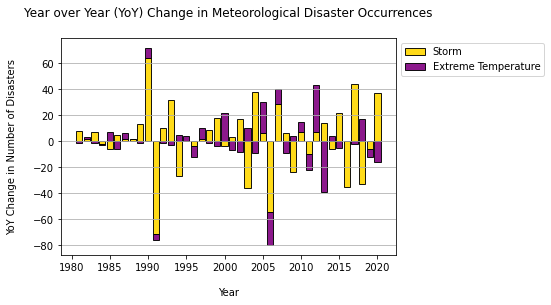

In [18]:
# YoY CHANGE IN METEOROLOGICAL DISASTER SINGLE BAR CHART

change_data = np.array([storm_disaster_change, extreme_temp_disaster_change])

data_shape = np.shape(change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(change_data, **kwargs):
    cum = change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(change_data, min=0)
cumulated_data_neg = get_cumulated_array(change_data, max=0)

# Re-merge negative and positive data.
row_mask = (change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["gold", "purple"]
labs = ["Storm", "Extreme Temperature"]

fig = plt.figure()
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Year over Year (YoY) Change in Meteorological Disaster Occurrences\n")
plt.xlabel("\nYear")
plt.ylabel("YoY Change in Number of Disasters\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

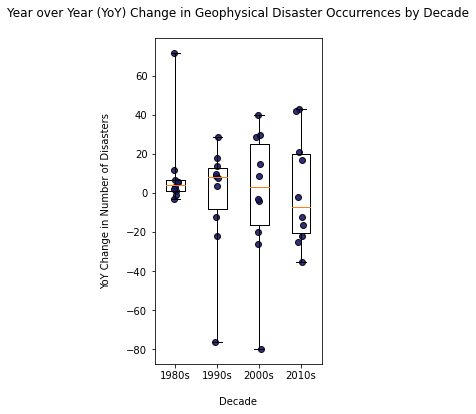

In [19]:
# YoY CHANGE IN METEOROLOGICAL DISASTER OCCURRENCES BOXPLOT

total_box_data = [meteorological_disaster_change[0:10], meteorological_disaster_change[10:20], meteorological_disaster_change[20:30], meteorological_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Geophysical Disaster Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersChangePerYearBOX.png", bbox_inches='tight')

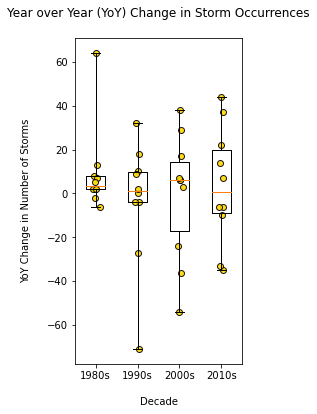

In [20]:
# YoY CHANGE IN STORM OCCURRENCES BOXPLOT

total_box_data = [storm_disaster_change[0:10], storm_disaster_change[10:20], storm_disaster_change[20:30], storm_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Storm Occurrences\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Storms\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'gold', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/stormsChangePerYearBOX.png", bbox_inches='tight')

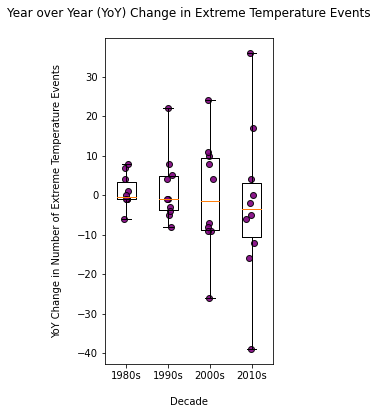

In [21]:
# YoY CHANGE IN EXTREME TEMPERATURE OCCURRENCES BOXPLOT

total_box_data = [extreme_temp_disaster_change[0:10], extreme_temp_disaster_change[10:20], extreme_temp_disaster_change[20:30], extreme_temp_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Extreme Temperature Events\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Extreme Temperature Events\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'purple', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/extremeTemperatureEventsChangePerYearBOX.png", bbox_inches='tight')

# YoY CHANGE IN METEOROLOGICAL DISASTER OCCURRENCE STATISTICS

In [22]:
# YoY CHANGE IN METEOROLOGICAL DISASTER OCCURRENCE STATISTICS

print("YoY CHANGE IN METEOROLOGICAL DISASTER OCCURRENCE STATISTICS")

# YoY change in meteorological disaster occurrence (total statistics)
print("\nYoY change in meteorological disaster occurrence (total statistics): ")
print(meteorological_disaster_change.describe())

# YoY change in meteorological disaster occurrence (1980s statistics)
print("\nYoY change in meteorological disaster occurrence (1980s statistics): ")
print(meteorological_disaster_change[0:10].describe())

# YoY change in meteorological disaster occurrence (1990s statistics)
print("\nYoY change in meteorological disaster occurrence (1990s statistics): ")
print(meteorological_disaster_change[10:20].describe())

# YoY change in meteorological disaster occurrence (2000s statistics)
print("\nYoY change in meteorological disaster occurrence (2000s statistics): ")
print(meteorological_disaster_change[20:30].describe())

# YoY change in meteorological disaster occurrence (2010s statistics)
print("\nYoY change in meteorological disaster occurrence (2010s statistics): ")
print(meteorological_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN METEOROLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN METEOROLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in natural disaster occurrence (1980s-2010s)
meteorological_occurrence_yoy_change_mean_1980s = meteorological_disaster_change[0:10].mean()
meteorological_occurrence_yoy_change_mean_2010s = meteorological_disaster_change[30:40].mean()
meteorological_occurrence_yoy_change_mean_percent_change_1980_to_2020 = 100*(meteorological_occurrence_yoy_change_mean_2010s-meteorological_occurrence_yoy_change_mean_1980s)/abs(meteorological_occurrence_yoy_change_mean_1980s)
print("Change in mean YoY change in meteorological disaster occurrence (1980s-2010s): {:.2f}%".format(meteorological_occurrence_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in natural disaster occurrence (1980s-2010s)
meteorological_occurrence_yoy_change_max_1980s = meteorological_disaster_change[0:10].max()
meteorological_occurrence_yoy_change_max_2010s = meteorological_disaster_change[30:40].max()
meteorological_occurrence_yoy_change_max_percent_change_1980_to_2020 = 100*(meteorological_occurrence_yoy_change_max_2010s-meteorological_occurrence_yoy_change_max_1980s)/abs(meteorological_occurrence_yoy_change_max_1980s)
print("Change in maximum YoY change in meteorological disaster occurrence (1980s-2010s): {:.2f}%".format(meteorological_occurrence_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in natural disaster occurrence (1980s-2010s)
meteorological_occurrence_yoy_change_min_1980s = meteorological_disaster_change[0:10].min()
meteorological_occurrence_yoy_change_min_2010s = meteorological_disaster_change[30:40].min()
meteorological_occurrence_yoy_change_min_percent_change_1980_to_2020 = 100*(meteorological_occurrence_yoy_change_min_2010s-meteorological_occurrence_yoy_change_min_1980s)/abs(meteorological_occurrence_yoy_change_min_1980s)
print("Change in minimum YoY change in meteorological disaster occurrence (1980s-2010s): {:.2f}%".format(meteorological_occurrence_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in natural disaster occurrence (1980s-2010s)
meteorological_occurrence_yoy_change_std_1980s = meteorological_disaster_change[0:10].std()
meteorological_occurrence_yoy_change_std_2010s = meteorological_disaster_change[30:40].std()
meteorological_occurrence_yoy_change_std_percent_change_1980_to_2020 = 100*(meteorological_occurrence_yoy_change_std_2010s-meteorological_occurrence_yoy_change_std_1980s)/abs(meteorological_occurrence_yoy_change_std_1980s)
print("Change in standard deviation YoY change in meteorological disaster occurrence (1980s-2010s): {:.2f}%".format(meteorological_occurrence_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN METEOROLOGICAL DISASTER OCCURRENCE STATISTICS

YoY change in meteorological disaster occurrence (total statistics): 
count    40.000000
mean      2.200000
std      28.435442
min     -80.000000
25%     -12.000000
50%       5.000000
75%      15.500000
max      72.000000
dtype: float64

YoY change in meteorological disaster occurrence (1980s statistics): 
count    10.000000
mean     10.500000
std      22.036586
min      -3.000000
25%       1.250000
50%       4.500000
75%       6.750000
max      72.000000
dtype: float64

YoY change in meteorological disaster occurrence (1990s statistics): 
count    10.000000
mean     -1.800000
std      29.802312
min     -76.000000
25%      -8.000000
50%       8.500000
75%      13.000000
max      29.000000
dtype: float64

YoY change in meteorological disaster occurrence (2000s statistics): 
count    10.000000
mean     -1.000000
std      35.178908
min     -80.000000
25%     -16.000000
50%       3.000000
75%      25.500000
max      40.000000
dty

In [23]:
# YoY CHANGE IN STORM OCCURRENCE STATISTICS

print("YoY CHANGE IN STORM DISASTER OCCURRENCE STATISTICS")

# YoY change in storm occurrence (total statistics)
print("\nYoY change in storm occurrence (total statistics): ")
print(storm_disaster_change.describe())

# YoY change in storm occurrence (1980s statistics)
print("\nYoY change in storm occurrence (1980s statistics): ")
print(storm_disaster_change[0:10].describe())

# YoY change in storm occurrence (1990s statistics)
print("\nYoY change in storm occurrence (1990s statistics): ")
print(storm_disaster_change[10:20].describe())

# YoY change in storm occurrence (2000s statistics)
print("\nYoY change in storm occurrence (2000s statistics): ")
print(storm_disaster_change[20:30].describe())

# YoY change in storm occurrence (2010s statistics)
print("\nYoY change in storm occurrence (2010s statistics): ")
print(storm_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN STORM OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN STORM OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in storm occurrence (1980s-2010s)
storm_occurrence_yoy_change_mean_1980s = storm_disaster_change[0:10].mean()
storm_occurrence_yoy_change_mean_2010s = storm_disaster_change[30:40].mean()
storm_occurrence_yoy_change_mean_percent_change_1980_to_2020 = 100*(storm_occurrence_yoy_change_mean_2010s-storm_occurrence_yoy_change_mean_1980s)/abs(storm_occurrence_yoy_change_mean_1980s)
print("Change in mean YoY change in storm occurrence (1980s-2010s): {:.2f}%".format(storm_occurrence_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in storm occurrence (1980s-2010s)
storm_occurrence_yoy_change_max_1980s = storm_disaster_change[0:10].max()
storm_occurrence_yoy_change_max_2010s = storm_disaster_change[30:40].max()
storm_occurrence_yoy_change_max_percent_change_1980_to_2020 = 100*(storm_occurrence_yoy_change_max_2010s-storm_occurrence_yoy_change_max_1980s)/abs(storm_occurrence_yoy_change_max_1980s)
print("Change in maximum YoY change in storm occurrence (1980s-2010s): {:.2f}%".format(storm_occurrence_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in storm occurrence (1980s-2010s)
storm_occurrence_yoy_change_min_1980s = storm_disaster_change[0:10].min()
storm_occurrence_yoy_change_min_2010s = storm_disaster_change[30:40].min()
storm_occurrence_yoy_change_min_percent_change_1980_to_2020 = 100*(storm_occurrence_yoy_change_min_2010s-storm_occurrence_yoy_change_min_1980s)/abs(storm_occurrence_yoy_change_min_1980s)
print("Change in minimum YoY change in storm occurrence (1980s-2010s): {:.2f}%".format(storm_occurrence_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in storm occurrence (1980s-2010s)
storm_occurrence_yoy_change_std_1980s = storm_disaster_change[0:10].std()
storm_occurrence_yoy_change_std_2010s = storm_disaster_change[30:40].std()
storm_occurrence_yoy_change_std_percent_change_1980_to_2020 = 100*(storm_occurrence_yoy_change_std_2010s-storm_occurrence_yoy_change_std_1980s)/abs(storm_occurrence_yoy_change_std_1980s)
print("Change in standard deviation YoY change in storm occurrence (1980s-2010s): {:.2f}%".format(storm_occurrence_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN STORM DISASTER OCCURRENCE STATISTICS

YoY change in storm occurrence (total statistics): 
count    40.00000
mean      2.15000
std      25.62906
min     -71.00000
25%      -6.00000
50%       4.00000
75%      13.25000
max      64.00000
dtype: float64

YoY change in storm occurrence (1980s statistics): 
count    10.000000
mean      9.500000
std      19.867617
min      -6.000000
25%       2.000000
50%       3.500000
75%       7.750000
max      64.000000
dtype: float64

YoY change in storm occurrence (1990s statistics): 
count    10.000000
mean     -3.500000
std      28.308813
min     -71.000000
25%      -4.000000
50%       1.000000
75%       9.750000
max      32.000000
dtype: float64

YoY change in storm occurrence (2000s statistics): 
count    10.000000
mean     -0.800000
std      28.839787
min     -54.000000
25%     -17.250000
50%       6.000000
75%      14.500000
max      38.000000
dtype: float64

YoY change in storm occurrence (2010s statistics): 
count    10.000000
mean 

In [24]:
# YoY CHANGE IN EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICS

print("YoY CHANGE IN EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICS")

# YoY change in extreme temperature event occurrence (total statistics)
print("\nYoY change in extreme temperature event occurrence (total statistics): ")
print(extreme_temp_disaster_change.describe())

# YoY change in extreme temperature event occurrence (1980s statistics)
print("\nYoY change in extreme temperature event occurrence (1980s statistics): ")
print(extreme_temp_disaster_change[0:10].describe())

# YoY change in extreme temperature event occurrence (1990s statistics)
print("\nYoY change in extreme temperature event occurrence (1990s statistics): ")
print(extreme_temp_disaster_change[10:20].describe())

# YoY change in extreme temperature event occurrence (2000s statistics)
print("\nYoY change in extreme temperature event occurrence (2000s statistics): ")
print(extreme_temp_disaster_change[20:30].describe())

# YoY change in extreme temperature event occurrence (2010s statistics)
print("\nYoY change in extreme temperature event occurrence (2010s statistics): ")
print(extreme_temp_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in extreme temperature event occurrence (1980s-2010s)
extreme_temp_occurrence_yoy_change_mean_1980s = extreme_temp_disaster_change[0:10].mean()
extreme_temp_occurrence_yoy_change_mean_2010s = extreme_temp_disaster_change[30:40].mean()
extreme_temp_occurrence_yoy_change_mean_percent_change_1980_to_2020 = 100*(extreme_temp_occurrence_yoy_change_mean_2010s-extreme_temp_occurrence_yoy_change_mean_1980s)/abs(extreme_temp_occurrence_yoy_change_mean_1980s)
print("Change in mean YoY change in extreme temperature event occurrence (1980s-2010s): {:.2f}%".format(extreme_temp_occurrence_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in extreme temperature event occurrence (1980s-2010s)
extreme_temp_occurrence_yoy_change_max_1980s = extreme_temp_disaster_change[0:10].max()
extreme_temp_occurrence_yoy_change_max_2010s = extreme_temp_disaster_change[30:40].max()
extreme_temp_occurrence_yoy_change_max_percent_change_1980_to_2020 = 100*(extreme_temp_occurrence_yoy_change_max_2010s-extreme_temp_occurrence_yoy_change_max_1980s)/abs(extreme_temp_occurrence_yoy_change_max_1980s)
print("Change in maximum YoY change in extreme temperature event occurrence (1980s-2010s): {:.2f}%".format(extreme_temp_occurrence_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in extreme temperature event occurrence (1980s-2010s)
extreme_temp_occurrence_yoy_change_min_1980s = extreme_temp_disaster_change[0:10].min()
extreme_temp_occurrence_yoy_change_min_2010s = extreme_temp_disaster_change[30:40].min()
extreme_temp_occurrence_yoy_change_min_percent_change_1980_to_2020 = 100*(extreme_temp_occurrence_yoy_change_min_2010s-extreme_temp_occurrence_yoy_change_min_1980s)/abs(extreme_temp_occurrence_yoy_change_min_1980s)
print("Change in minimum YoY change in extreme temperature event occurrence (1980s-2010s): {:.2f}%".format(extreme_temp_occurrence_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in extreme temperature event occurrence (1980s-2010s)
extreme_temp_occurrence_yoy_change_std_1980s = extreme_temp_disaster_change[0:10].std()
extreme_temp_occurrence_yoy_change_std_2010s = extreme_temp_disaster_change[30:40].std()
extreme_temp_occurrence_yoy_change_std_percent_change_1980_to_2020 = 100*(extreme_temp_occurrence_yoy_change_std_2010s-extreme_temp_occurrence_yoy_change_std_1980s)/abs(extreme_temp_occurrence_yoy_change_std_1980s)
print("Change in standard deviation YoY change in extreme temperature event occurrence (1980s-2010s): {:.2f}%".format(extreme_temp_occurrence_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN EXTREME TEMPERATURE EVENT OCCURRENCE STATISTICS

YoY change in extreme temperature event occurrence (total statistics): 
count    40.000000
mean      0.050000
std      12.699586
min     -39.000000
25%      -6.000000
50%      -1.000000
75%       5.500000
max      36.000000
dtype: float64

YoY change in extreme temperature event occurrence (1980s statistics): 
count    10.00000
mean      1.00000
std       4.21637
min      -6.00000
25%      -1.00000
50%      -0.50000
75%       3.25000
max       8.00000
dtype: float64

YoY change in extreme temperature event occurrence (1990s statistics): 
count    10.000000
mean      1.700000
std       8.667308
min      -8.000000
25%      -3.750000
50%      -1.000000
75%       4.750000
max      22.000000
dtype: float64

YoY change in extreme temperature event occurrence (2000s statistics): 
count    10.000000
mean     -0.200000
std      14.250146
min     -26.000000
25%      -8.750000
50%      -1.500000
75%       9.500000
max      24.000000
d

# METEOROLOGICAL DISASTER YEARLY DAMAGES ANALYSIS

In [25]:
storm_costs = storm_data[['Year', 'Total Damages']]
storm_costs = storm_costs.groupby('Year').sum()
storm_costs = storm_costs.squeeze()

extreme_temp_costs = extreme_temp_data[['Year', 'Total Damages']]
extreme_temp_costs = extreme_temp_costs.groupby('Year').sum()
extreme_temp_costs = extreme_temp_costs.squeeze()
extreme_temp_costs[2016] = 0
extreme_temp_costs = extreme_temp_costs.sort_index()

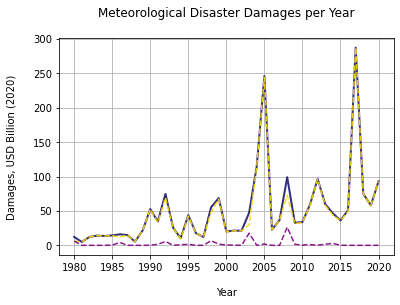

In [26]:
# METEOROLOGICAL DISASTER YEARLY DAMAGES SINGLE LINE PLOT

plt.grid(axis = 'both')
plt.title("Meteorological Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Damages, USD Billion (2020)\n")
plt.plot(meteorological_costs.index, meteorological_costs, linewidth=2, color = 'midnightblue', alpha = 0.9, label = 'Total Meteorological')
plt.plot(storm_costs.index, storm_costs, linestyle = '--', color = 'gold', alpha = 0.9, label = 'Storm')
plt.plot(extreme_temp_costs.index, extreme_temp_costs, linestyle = '--', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

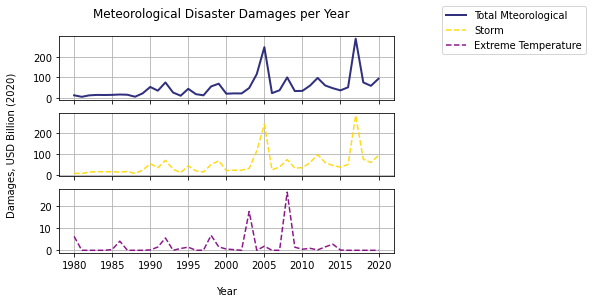

In [27]:
# METEOROLOGICAL DISASTER YEARLY DAMAGES MULTIPLE LINE PLOTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Meteorological Disaster Damages per Year\n")
axs[1].set_ylabel("Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(meteorological_costs.index, meteorological_costs, linewidth=2, color = 'midnightblue', alpha = 0.9, label = 'Total Mteorological')
axs[1].plot(storm_costs.index, storm_costs, linestyle = '--', color = 'gold', alpha = 0.9, label = 'Storm')
axs[2].plot(extreme_temp_costs.index, extreme_temp_costs, linestyle = '--', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

plt.sca(axs[0])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

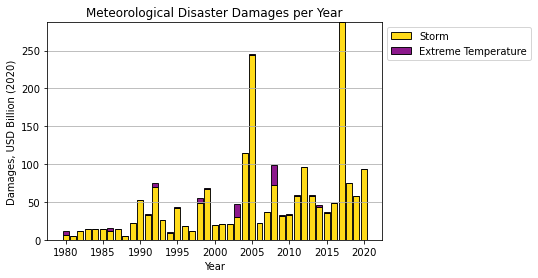

In [28]:
# METEOROLOGICAL DISASTER YEARLY DAMAGES SINGLE BAR CHART

plt.grid(axis = 'y')
plt.title("Meteorological Disaster Damages per Year")
plt.xlabel("Year")
plt.ylabel("Damages, USD Billion (2020)")

plt.bar(storm_costs.index, storm_costs, edgecolor = 'black', color = 'gold', alpha = 0.9, label = 'Storm')
plt.bar(extreme_temp_costs.index, extreme_temp_costs, bottom = storm_costs, edgecolor = 'black', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

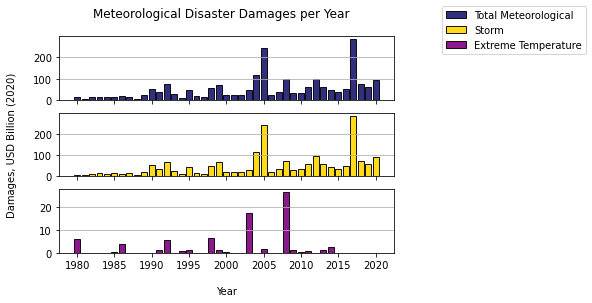

In [29]:
# METEOROLOGICAL DISASTER YEARLY DAMAGES MULTIPLE BAR CHARTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Meteorological Disaster Damages per Year\n")
axs[1].set_ylabel("Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(meteorological_costs.index, meteorological_costs, edgecolor = 'black', color = 'midnightblue', alpha = 0.9, label = 'Total Meteorological')
axs[1].bar(storm_costs.index, storm_costs, edgecolor = 'black', color = 'gold', alpha = 0.9, label = 'Storm')
axs[2].bar(extreme_temp_costs.index, extreme_temp_costs, edgecolor = 'black', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.sca(axs[0])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

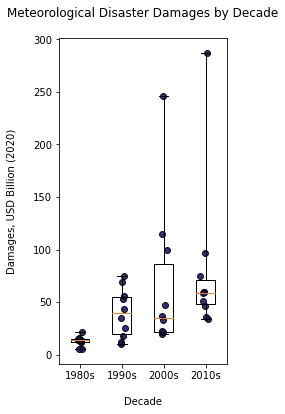

In [30]:
# METEOROLOGICAL DISASTER YEARLY DAMAGES BOXPLOT

meteorological_box_data = [meteorological_costs[0:10], meteorological_costs[10:20], meteorological_costs[20:30], meteorological_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Meteorological Disaster Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.boxplot(meteorological_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,meteorological_box_data[0], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,meteorological_box_data[1], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,meteorological_box_data[2], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,meteorological_box_data[3], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearBOX.png", bbox_inches='tight')

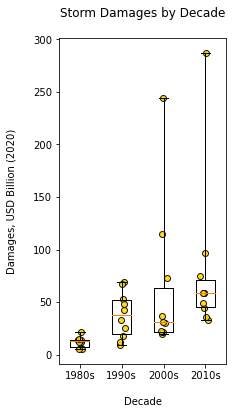

In [31]:
# STORM YEARLY DAMAGES BOXPLOT

storm_box_data = [storm_costs[0:10], storm_costs[10:20], storm_costs[20:30], storm_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Storm Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.boxplot(storm_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,storm_box_data[0], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,storm_box_data[1], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,storm_box_data[2], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,storm_box_data[3], color = 'gold', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/stormCostsPerYearBOX.png", bbox_inches='tight')

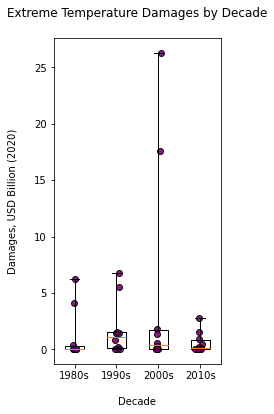

In [32]:
# EXTREME TEMPERATURE EVENT YEARLY DAMAGES BOXPLOT

extreme_temp_box_data = [extreme_temp_costs[0:10], extreme_temp_costs[10:20], extreme_temp_costs[20:30], extreme_temp_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Extreme Temperature Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.boxplot(extreme_temp_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,extreme_temp_box_data[0], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,extreme_temp_box_data[1], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,extreme_temp_box_data[2], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,extreme_temp_box_data[3], color = 'purple', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/extremeTemperatureEventCostsPerYearBOX.png", bbox_inches='tight')

# METEOROLOGICAL DISASTER YEARLY DAMAGES STATISTICS

In [33]:
# METEOROLOGICAL DISASTER YEARLY DAMAGES STATISTICS

print("METEOROLOGICAL DISASTER YEARLY DAMAGES STATISTICS")

# meteorological disaster yearly damages (total statistics)
print("\nMeteorological disaster yearly damages (total statistics): ")
print(meteorological_costs.describe())

# meteorological disaster yearly damages (1980s statistics)
print("\nMeteorological disaster yearly damages (1980s statistics): ")
print(meteorological_costs[0:10].describe())

# meteorological disaster yearly damages (1990s statistics)
print("\nMeteorological disaster yearly damages (1990s statistics): ")
print(meteorological_costs[10:20].describe())

# meteorological disaster yearly damages (2000s statistics)
print("\nMeteorological disaster yearly damages (2000s statistics): ")
print(meteorological_costs[20:30].describe())

# meteorological disaster yearly damages (2010s statistics)
print("\nMeteorological disaster yearly damages (2010s statistics): ")
print(meteorological_costs[30:40].describe())

print("\n")

# METEOROLOGICAL DISASTER YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("METEOROLOGICAL DISASTER YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean meteorological disaster yearly damages (1980s-2010s)
meteorological_damages_mean_1980s = meteorological_costs[0:10].mean()
meteorological_damages_mean_2010s = meteorological_costs[30:40].mean()
meteorological_damages_mean_percent_change_1980_to_2020 = 100*(meteorological_damages_mean_2010s-meteorological_damages_mean_1980s)/abs(meteorological_damages_mean_1980s)
print("Change in mean meteorological disaster yearly damages (1980s-2010s): {:.2f}%".format(meteorological_damages_mean_percent_change_1980_to_2020))

# change in maximum meteorological disaster yearly damages (1980s-2010s)
meteorological_damages_max_1980s = meteorological_costs[0:10].max()
meteorological_damages_max_2010s = meteorological_costs[30:40].max()
meteorological_damages_max_percent_change_1980_to_2020 = 100*(meteorological_damages_max_2010s-meteorological_damages_max_1980s)/abs(meteorological_damages_max_1980s)
print("Change in maximum meteorological disaster yearly damages (1980s-2010s): {:.2f}%".format(meteorological_damages_max_percent_change_1980_to_2020))

# change in minimum meteorological disaster yearly damages (1980s-2010s)
meteorological_damages_min_1980s = meteorological_costs[0:10].min()
meteorological_damages_min_2010s = meteorological_costs[30:40].min()
meteorological_damages_min_percent_change_1980_to_2020 = 100*(meteorological_damages_min_2010s-meteorological_damages_min_1980s)/abs(meteorological_damages_min_1980s)
print("Change in minimum meteorological disaster yearly damages (1980s-2010s): {:.2f}%".format(meteorological_damages_min_percent_change_1980_to_2020))

# change in standard deviation of meteorological disaster yearly damages (1980s-2010s)
meteorological_damages_std_1980s = meteorological_costs[0:10].std()
meteorological_damages_std_2010s = meteorological_costs[30:40].std()
meteorological_damages_std_percent_change_1980_to_2020 = 100*(meteorological_damages_std_2010s-meteorological_damages_std_1980s)/abs(meteorological_damages_std_1980s)
print("Change in standard deviation of meteorological disaster yearly damages (1980s-2010s): {:.2f}%\n".format(meteorological_damages_std_percent_change_1980_to_2020))

METEOROLOGICAL DISASTER YEARLY DAMAGES STATISTICS

Meteorological disaster yearly damages (total statistics): 
count     41.000000
mean      50.812162
std       57.079535
min        4.901970
25%       16.020657
50%       34.682344
75%       59.243479
max      287.256788
Name: Total Damages, dtype: float64

Meteorological disaster yearly damages (1980s statistics): 
count    10.000000
mean     12.898211
std       4.895956
min       4.901970
25%      12.073083
50%      13.862893
75%      14.776082
max      21.548437
Name: Total Damages, dtype: float64

Meteorological disaster yearly damages (1990s statistics): 
count    10.000000
mean     39.558125
std      23.150898
min      10.249165
25%      19.692493
50%      39.215546
75%      54.641160
max      74.696982
Name: Total Damages, dtype: float64

Meteorological disaster yearly damages (2000s statistics): 
count     10.000000
mean      66.250009
std       71.633825
min       19.970988
25%       21.776088
50%       34.803095
75%       86.1

In [34]:
# STORM YEARLY DAMAGES STATISTICS

print("STORM YEARLY DAMAGES STATISTICS")

# storm yearly damages (total statistics)
print("\nStorm yearly damages (total statistics): ")
print(storm_costs.describe())

# storm yearly damages (1980s statistics)
print("\nStorm yearly damages (1980s statistics): ")
print(storm_costs[0:10].describe())

# storm yearly damages (1990s statistics)
print("\nStorm yearly damages (1990s statistics): ")
print(storm_costs[10:20].describe())

# storm yearly damages (2000s statistics)
print("\nStorm disaster yearly damages (2000s statistics): ")
print(storm_costs[20:30].describe())

# storm yearly damages (2010s statistics)
print("\nStorm yearly damages (2010s statistics): ")
print(storm_costs[30:40].describe())

print("\n")

# STORM YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("STORM YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean storm yearly damages (1980s-2010s)
storm_damages_mean_1980s = storm_costs[0:10].mean()
storm_damages_mean_2010s = storm_costs[30:40].mean()
storm_damages_mean_percent_change_1980_to_2020 = 100*(storm_damages_mean_2010s-storm_damages_mean_1980s)/abs(storm_damages_mean_1980s)
print("Change in mean storm yearly damages (1980s-2010s): {:.2f}%".format(storm_damages_mean_percent_change_1980_to_2020))

# change in maximum storm yearly damages (1980s-2010s)
storm_damages_max_1980s = storm_costs[0:10].max()
storm_damages_max_2010s = storm_costs[30:40].max()
storm_damages_max_percent_change_1980_to_2020 = 100*(storm_damages_max_2010s-storm_damages_max_1980s)/abs(storm_damages_max_1980s)
print("Change in maximum storm yearly damages (1980s-2010s): {:.2f}%".format(storm_damages_max_percent_change_1980_to_2020))

# change in minimum storm yearly damages (1980s-2010s)
storm_damages_min_1980s = storm_costs[0:10].min()
storm_damages_min_2010s = storm_costs[30:40].min()
storm_damages_min_percent_change_1980_to_2020 = 100*(storm_damages_min_2010s-storm_damages_min_1980s)/abs(storm_damages_min_1980s)
print("Change in minimum storm yearly damages (1980s-2010s): {:.2f}%".format(storm_damages_min_percent_change_1980_to_2020))

# change in standard deviation of storm yearly damages (1980s-2010s)
storm_damages_std_1980s = storm_costs[0:10].std()
storm_damages_std_2010s = storm_costs[30:40].std()
storm_damages_std_percent_change_1980_to_2020 = 100*(storm_damages_std_2010s-storm_damages_std_1980s)/abs(storm_damages_std_1980s)
print("Change in standard deviation of storm yearly damages (1980s-2010s): {:.2f}%\n".format(storm_damages_std_percent_change_1980_to_2020))

STORM YEARLY DAMAGES STATISTICS

Storm yearly damages (total statistics): 
count     41.000000
mean      48.756460
std       56.745411
min        4.901970
25%       14.918641
50%       33.219939
75%       58.251598
max      287.256788
Name: Total Damages, dtype: float64

Storm yearly damages (1980s statistics): 
count    10.000000
mean     11.824991
std       5.193640
min       4.901970
25%       7.416648
50%      12.827922
75%      14.079236
max      21.548437
Name: Total Damages, dtype: float64

Storm yearly damages (1990s statistics): 
count    10.000000
mean     37.776854
std      21.681713
min       9.422422
25%      19.692493
50%      37.778113
75%      51.527761
max      69.129585
Name: Total Damages, dtype: float64

Storm disaster yearly damages (2000s statistics): 
count     10.000000
mean      61.455502
std       71.020941
min       19.416406
25%       21.557425
50%       30.693071
75%       63.780614
max      244.143769
Name: Total Damages, dtype: float64

Storm yearly damag

In [35]:
# EXTREME TEMPERATURE EVENT YEARLY DAMAGES STATISTICS

print("EXTREME TEMPERATURE EVENT YEARLY DAMAGES STATISTICS")

# extreme_temp yearly damages (total statistics)
print("\nExtreme temperature event yearly damages (total statistics): ")
print(extreme_temp_costs.describe())

# extreme_temp yearly damages (1980s statistics)
print("\nExtreme temperature event yearly damages (1980s statistics): ")
print(extreme_temp_costs[0:10].describe())

# extreme_temp yearly damages (1990s statistics)
print("\nExtreme temperature event yearly damages (1990s statistics): ")
print(extreme_temp_costs[10:20].describe())

# extreme_temp yearly damages (2000s statistics)
print("\nExtreme temperature event disaster yearly damages (2000s statistics): ")
print(extreme_temp_costs[20:30].describe())

# extreme_temp yearly damages (2010s statistics)
print("\nExtreme temperature event yearly damages (2010s statistics): ")
print(extreme_temp_costs[30:40].describe())

print("\n")

# EXTREME TEMPERATURE EVENT YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("EXTREME TEMPERATURE EVENT YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean extreme temperature event yearly damages (1980s-2010s)
extreme_temp_damages_mean_1980s = extreme_temp_costs[0:10].mean()
extreme_temp_damages_mean_2010s = extreme_temp_costs[30:40].mean()
extreme_temp_damages_mean_percent_change_1980_to_2020 = 100*(extreme_temp_damages_mean_2010s-extreme_temp_damages_mean_1980s)/abs(extreme_temp_damages_mean_1980s)
print("Change in mean extreme temperature event yearly damages (1980s-2010s): {:.2f}%".format(extreme_temp_damages_mean_percent_change_1980_to_2020))

# change in maximum extreme temperature event yearly damages (1980s-2010s)
extreme_temp_damages_max_1980s = extreme_temp_costs[0:10].max()
extreme_temp_damages_max_2010s = extreme_temp_costs[30:40].max()
extreme_temp_damages_max_percent_change_1980_to_2020 = 100*(extreme_temp_damages_max_2010s-extreme_temp_damages_max_1980s)/abs(extreme_temp_damages_max_1980s)
print("Change in maximum extreme temperature event yearly damages (1980s-2010s): {:.2f}%".format(extreme_temp_damages_max_percent_change_1980_to_2020))

# change in minimum extreme temperature event yearly damages (1980s-2010s)
extreme_temp_damages_min_1980s = extreme_temp_costs[0:10].min()
extreme_temp_damages_min_2010s = extreme_temp_costs[30:40].min()
extreme_temp_damages_min_percent_change_1980_to_2020 = 100*(extreme_temp_damages_min_2010s-extreme_temp_damages_min_1980s)/abs(extreme_temp_damages_min_1980s)
print("Change in minimum extreme temperature event yearly damages (1980s-2010s): {:.2f}%".format(extreme_temp_damages_min_percent_change_1980_to_2020))

# change in standard deviation of extreme temperature event yearly damages (1980s-2010s)
extreme_temp_damages_std_1980s = extreme_temp_costs[0:10].std()
extreme_temp_damages_std_2010s = extreme_temp_costs[30:40].std()
extreme_temp_damages_std_percent_change_1980_to_2020 = 100*(extreme_temp_damages_std_2010s-extreme_temp_damages_std_1980s)/abs(extreme_temp_damages_std_1980s)
print("Change in standard deviation of extreme temperature event yearly damages (1980s-2010s): {:.2f}%\n".format(extreme_temp_damages_std_percent_change_1980_to_2020))

EXTREME TEMPERATURE EVENT YEARLY DAMAGES STATISTICS

Extreme temperature event yearly damages (total statistics): 
count    41.000000
mean      2.010425
std       4.977669
min       0.000000
25%       0.000000
50%       0.171692
75%       1.462405
max      26.294309
Name: Total Damages, dtype: float64

Extreme temperature event yearly damages (1980s statistics): 
count    10.000000
mean      1.073220
std       2.232017
min       0.000000
25%       0.000000
50%       0.000000
75%       0.259367
max       6.266630
Name: Total Damages, dtype: float64

Extreme temperature event yearly damages (1990s statistics): 
count    10.000000
mean      1.781271
std       2.410394
min       0.000000
25%       0.083844
50%       1.119602
75%       1.527190
max       6.765617
Name: Total Damages, dtype: float64

Extreme temperature event disaster yearly damages (2000s statistics): 
count    10.000000
mean      4.794507
std       9.282928
min       0.000000
25%       0.000000
50%       0.423067
75%      

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


# YoY CHANGE IN METEOROLOGICAL DISASTER YEARLY DAMAGES ANALYSIS

In [36]:
# CALCULATE YoY CHANGE IN METEOROLOGICAL DISASTER DAMAGES

meteorological_costs_change = [meteorological_costs[i+1]-meteorological_costs[i] for i in range(1980,2020)]
meteorological_costs_change = pd.Series(meteorological_costs_change)

storm_costs_change = [storm_costs[i+1]-storm_costs[i] for i in range(1980,2020)]
storm_costs_change = pd.Series(storm_costs_change)

extreme_temp_costs_change = [extreme_temp_costs[i+1]-extreme_temp_costs[i] for i in range(1980,2020)]
extreme_temp_costs_change = pd.Series(extreme_temp_costs_change)

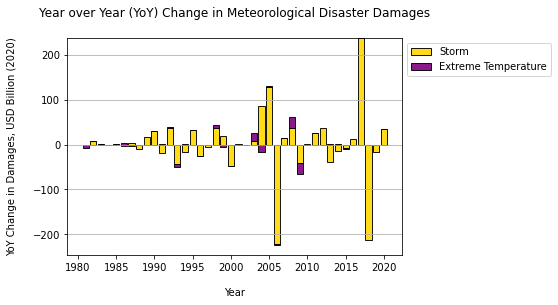

In [37]:
# YoY CHANGE IN METEOROLOGICAL DISASTER YEARLY DAMAGES SINGLE BAR CHART

costs_change_data = np.array([storm_costs_change, extreme_temp_costs_change])

data_shape = np.shape(costs_change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(costs_change_data, **kwargs):
    cum = costs_change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(costs_change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(costs_change_data, min=0)
cumulated_data_neg = get_cumulated_array(costs_change_data, max=0)

# Re-merge negative and positive data.
row_mask = (costs_change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["gold", "purple"]
labs = ["Storm", "Extreme Temperature"]

#fig = plt.figure(figsize=(5,20))
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), costs_change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Year over Year (YoY) Change in Meteorological Disaster Damages\n")
plt.xlabel("\nYear")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

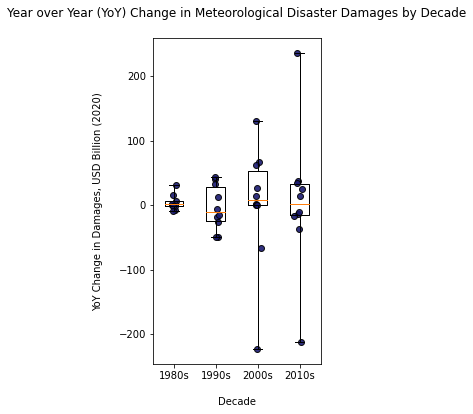

In [38]:
# YoY CHANGE IN METEOROLOGICAL DISASTER YEARLY DAMAGES BOXPLOT

total_box_cost_data = [meteorological_costs_change[0:10], meteorological_costs_change[10:20], meteorological_costs_change[20:30], meteorological_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Meteorological Disaster Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsChangePerYearBOX.png", bbox_inches='tight')


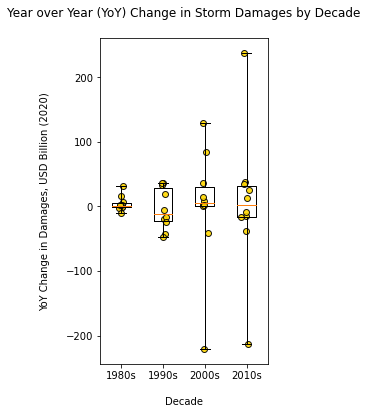

In [39]:
# YoY CHANGE IN STORM YEARLY DAMAGES BOXPLOT

total_box_cost_data = [storm_costs_change[0:10], storm_costs_change[10:20], storm_costs_change[20:30], storm_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Storm Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'gold', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/stormCostsChangePerYearBOX.png", bbox_inches='tight')


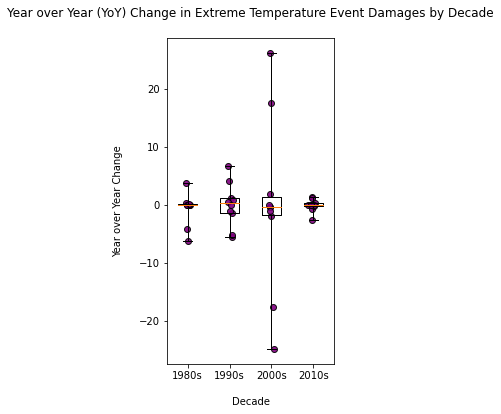

In [40]:
# YoY CHANGE IN EXTREME TEMPERATURE EVENT YEARLY DAMAGES BOXPLOT

total_box_cost_data = [extreme_temp_costs_change[0:10], extreme_temp_costs_change[10:20], extreme_temp_costs_change[20:30], extreme_temp_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Extreme Temperature Event Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("Year over Year Change\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'purple', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/extremeTemperatureEventCostsChangePerYearBOX.png", bbox_inches='tight')


# YoY CHANGE IN METEOROLOGICAL DISASTER DAMAGES STATISTICS

In [41]:
# YoY CHANGE IN METEOROLOGICAL DISASTER DAMAGES STATISTICS

print("YoY CHANGE IN METEOROLOGICAL DISASTER DAMAGES STATISTICS")

# YoY change in meteorological disaster damages (total statistics)
print("\nYoY change in meteorological disaster damages (total statistics): ")
print(meteorological_costs_change.describe())

# YoY change in meteorological disaster damages (1980s statistics)
print("\nYoY change in meteorological disaster damages (1980s statistics): ")
print(meteorological_costs_change[0:10].describe())

# YoY change in meteorological disaster damages (1990s statistics)
print("\nYoY change in meteorological disaster damages (1990s statistics): ")
print(meteorological_costs_change[10:20].describe())

# YoY change in meteorological disaster damages (2000s statistics)
print("\nYoY change in meteorological disaster damages (2000s statistics): ")
print(meteorological_costs_change[20:30].describe())

# YoY change in meteorological disaster damages (2010s statistics)
print("\nYoY change in meteorological disaster damages (2010s statistics): ")
print(meteorological_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN METEOROLOGICAL DISASTER DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN METEOROLOGICAL DISASTER DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in meteorological disasters damages (1980s-2010s)
meteorological_damages_yoy_change_mean_1980s = meteorological_costs_change[0:10].mean()
meteorological_damages_yoy_change_mean_2010s = meteorological_costs_change[30:40].mean()
meteorological_damages_yoy_change_mean_percent_change_1980_to_2020 = 100*(meteorological_damages_yoy_change_mean_2010s-meteorological_damages_yoy_change_mean_1980s)/abs(meteorological_damages_yoy_change_mean_1980s)
print("Change in mean YoY change in meteorological disasters damages (1980s-2010s): {:.2f}%".format(meteorological_damages_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in meteorological disasters damages (1980s-2010s)
meteorological_damages_yoy_change_max_1980s = meteorological_costs_change[0:10].max()
meteorological_damages_yoy_change_max_2010s = meteorological_costs_change[30:40].max()
meteorological_damages_yoy_change_max_percent_change_1980_to_2020 = 100*(meteorological_damages_yoy_change_max_2010s-meteorological_damages_yoy_change_max_1980s)/abs(meteorological_damages_yoy_change_max_1980s)
print("Change in maximum YoY change in meteorological disasters damages (1980s-2010s): {:.2f}%".format(meteorological_damages_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in meteorological disasters damages (1980s-2010s)
meteorological_damages_yoy_change_min_1980s = meteorological_costs_change[0:10].min()
meteorological_damages_yoy_change_min_2010s = meteorological_costs_change[30:40].min()
meteorological_damages_yoy_change_min_percent_change_1980_to_2020 = 100*(meteorological_damages_yoy_change_min_2010s-meteorological_damages_yoy_change_min_1980s)/abs(meteorological_damages_yoy_change_min_1980s)
print("Change in minimum YoY change in meteorological disasters damages (1980s-2010s): {:.2f}%".format(meteorological_damages_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in meteorological disasters damages (1980s-2010s)
meteorological_damages_yoy_change_std_1980s = meteorological_costs_change[0:10].std()
meteorological_damages_yoy_change_std_2010s = meteorological_costs_change[30:40].std()
meteorological_damages_yoy_change_std_percent_change_1980_to_2020 = 100*(meteorological_damages_yoy_change_std_2010s-meteorological_damages_yoy_change_std_1980s)/abs(meteorological_damages_yoy_change_std_1980s)
print("Change in standard deviation of YoY change in meteorological disasters damages (1980s-2010s): {:.2f}%".format(meteorological_damages_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN METEOROLOGICAL DISASTER DAMAGES STATISTICS

YoY change in meteorological disaster damages (total statistics): 
count     40.000000
mean       2.018447
std       71.453740
min     -223.337935
25%      -13.780866
50%        1.216335
75%       27.560331
max      236.158070
dtype: float64

YoY change in meteorological disaster damages (1980s statistics): 
count    10.000000
mean      4.051823
std      11.909136
min      -9.623356
25%      -0.947386
50%       1.199756
75%       5.867033
max      31.158030
dtype: float64

YoY change in meteorological disaster damages (1990s statistics): 
count    10.000000
mean     -3.273548
std      34.481813
min     -49.010021
25%     -24.046840
50%     -10.484903
75%      28.470139
max      43.123730
dtype: float64

YoY change in meteorological disaster damages (2000s statistics): 
count     10.000000
mean       1.377486
std       94.713406
min     -223.337935
25%       -0.015885
50%        7.818771
75%       53.310577
max      130.947982
dt

In [42]:
# YoY CHANGE IN STORM DAMAGES STATISTICS

print("YoY CHANGE IN STORM DAMAGES STATISTICS")

# YoY change in storm damages (total statistics)
print("\nYoY change in storm damages (total statistics): ")
print(storm_costs_change.describe())

# YoY change in storm damages (1980s statistics)
print("\nYoY change in storm damages (1980s statistics): ")
print(storm_costs_change[0:10].describe())

# YoY change in storm damages (1990s statistics)
print("\nYoY change in storm damages (1990s statistics): ")
print(storm_costs_change[10:20].describe())

# YoY change in storm damages (2000s statistics)
print("\nYoY change in storm damages (2000s statistics): ")
print(storm_costs_change[20:30].describe())

# YoY change in storm damages (2010s statistics)
print("\nYoY change in storm damages (2010s statistics): ")
print(storm_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN STORM DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN STORM DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in storm damages (1980s-2010s)
storm_damages_yoy_change_mean_1980s = storm_costs_change[0:10].mean()
storm_damages_yoy_change_mean_2010s = storm_costs_change[30:40].mean()
storm_damages_yoy_change_mean_percent_change_1980_to_2020 = 100*(storm_damages_yoy_change_mean_2010s-storm_damages_yoy_change_mean_1980s)/abs(storm_damages_yoy_change_mean_1980s)
print("Change in mean YoY change in storm damages (1980s-2010s): {:.2f}%".format(storm_damages_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in storm damages (1980s-2010s)
storm_damages_yoy_change_max_1980s = storm_costs_change[0:10].max()
storm_damages_yoy_change_max_2010s = storm_costs_change[30:40].max()
storm_damages_yoy_change_max_percent_change_1980_to_2020 = 100*(storm_damages_yoy_change_max_2010s-storm_damages_yoy_change_max_1980s)/abs(storm_damages_yoy_change_max_1980s)
print("Change in maximum YoY change in storm damages (1980s-2010s): {:.2f}%".format(storm_damages_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in storm damages (1980s-2010s)
storm_damages_yoy_change_min_1980s = storm_costs_change[0:10].min()
storm_damages_yoy_change_min_2010s = storm_costs_change[30:40].min()
storm_damages_yoy_change_min_percent_change_1980_to_2020 = 100*(storm_damages_yoy_change_min_2010s-storm_damages_yoy_change_min_1980s)/abs(storm_damages_yoy_change_min_1980s)
print("Change in minimum YoY change in storm damages (1980s-2010s): {:.2f}%".format(storm_damages_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in storm damages (1980s-2010s)
storm_damages_yoy_change_std_1980s = storm_costs_change[0:10].std()
storm_damages_yoy_change_std_2010s = storm_costs_change[30:40].std()
storm_damages_yoy_change_std_percent_change_1980_to_2020 = 100*(storm_damages_yoy_change_std_2010s-storm_damages_yoy_change_std_1980s)/abs(storm_damages_yoy_change_std_1980s)
print("Change in standard deviation of YoY change in storm damages (1980s-2010s): {:.2f}%".format(storm_damages_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN STORM DAMAGES STATISTICS

YoY change in storm damages (total statistics): 
count     40.000000
mean       2.175113
std       70.559031
min     -221.488296
25%      -14.882761
50%        1.809910
75%       26.551656
max      238.014420
dtype: float64

YoY change in storm damages (1980s statistics): 
count    10.000000
mean      4.660860
std      11.399667
min      -9.624665
25%      -0.885600
50%       1.225908
75%       6.103763
max      30.981764
dtype: float64

YoY change in storm damages (1990s statistics): 
count    10.000000
mean     -3.311380
std      32.272280
min     -47.702671
25%     -23.309029
50%     -10.924793
75%      29.335058
max      36.411150
dtype: float64

YoY change in storm damages (2000s statistics): 
count     10.000000
mean       1.385621
std       92.034806
min     -221.488296
25%        0.416355
50%        5.324138
75%       30.530963
max      129.098342
dtype: float64

YoY change in storm damages (2010s statistics): 
count     10.000000
mean   

In [43]:
# YoY CHANGE IN EXTREME TEMPERATURE EVENT DAMAGES STATISTICS

print("YoY CHANGE IN EXTREME TEMPERATURE EVENT DAMAGES STATISTICS")

# YoY change in extreme temperature event damages (total statistics)
print("\nYoY change in extreme temperature event damages (total statistics): ")
print(extreme_temp_costs_change.describe())

# YoY change in extreme_temp damages (1980s statistics)
print("\nYoY change in extreme temperature event damages (1980s statistics): ")
print(extreme_temp_costs_change[0:10].describe())

# YoY change in extreme_temp damages (1990s statistics)
print("\nYoY change in extreme temperature event damages (1990s statistics): ")
print(extreme_temp_costs_change[10:20].describe())

# YoY change in extreme_temp damages (2000s statistics)
print("\nYoY change in extreme temperature event damages (2000s statistics): ")
print(extreme_temp_costs_change[20:30].describe())

# YoY change in extreme_temp damages (2010s statistics)
print("\nYoY change in extreme temperature event damages (2010s statistics): ")
print(extreme_temp_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN EXTREME TEMPERATURE EVENT DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN EXTREME TEMPERATURE EVENT DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in extreme temperature event damages (1980s-2010s)
extreme_temp_damages_yoy_change_mean_1980s = extreme_temp_costs_change[0:10].mean()
extreme_temp_damages_yoy_change_mean_2010s = extreme_temp_costs_change[30:40].mean()
extreme_temp_damages_yoy_change_mean_percent_change_1980_to_2020 = 100*(extreme_temp_damages_yoy_change_mean_2010s-extreme_temp_damages_yoy_change_mean_1980s)/abs(extreme_temp_damages_yoy_change_mean_1980s)
print("Change in mean YoY change in extreme temperature event damages (1980s-2010s): {:.2f}%".format(extreme_temp_damages_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in extreme temperature event damages (1980s-2010s)
extreme_temp_damages_yoy_change_max_1980s = extreme_temp_costs_change[0:10].max()
extreme_temp_damages_yoy_change_max_2010s = extreme_temp_costs_change[30:40].max()
extreme_temp_damages_yoy_change_max_percent_change_1980_to_2020 = 100*(extreme_temp_damages_yoy_change_max_2010s-extreme_temp_damages_yoy_change_max_1980s)/abs(extreme_temp_damages_yoy_change_max_1980s)
print("Change in maximum YoY change in extreme temperature event damages (1980s-2010s): {:.2f}%".format(extreme_temp_damages_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in extreme temperature event damages (1980s-2010s)
extreme_temp_damages_yoy_change_min_1980s = extreme_temp_costs_change[0:10].min()
extreme_temp_damages_yoy_change_min_2010s = extreme_temp_costs_change[30:40].min()
extreme_temp_damages_yoy_change_min_percent_change_1980_to_2020 = 100*(extreme_temp_damages_yoy_change_min_2010s-extreme_temp_damages_yoy_change_min_1980s)/abs(extreme_temp_damages_yoy_change_min_1980s)
print("Change in minimum YoY change in extreme temperature event damages (1980s-2010s): {:.2f}%".format(extreme_temp_damages_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in extreme temperature event damages (1980s-2010s)
extreme_temp_damages_yoy_change_std_1980s = extreme_temp_costs_change[0:10].std()
extreme_temp_damages_yoy_change_std_2010s = extreme_temp_costs_change[30:40].std()
extreme_temp_damages_yoy_change_std_percent_change_1980_to_2020 = 100*(extreme_temp_damages_yoy_change_std_2010s-extreme_temp_damages_yoy_change_std_1980s)/abs(extreme_temp_damages_yoy_change_std_1980s)
print("Change in standard deviation of YoY change in extreme temperature event damages (1980s-2010s): {:.2f}%".format(extreme_temp_damages_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN EXTREME TEMPERATURE EVENT DAMAGES STATISTICS

YoY change in extreme temperature event damages (total statistics): 
count    40.000000
mean     -0.156666
std       7.411167
min     -24.896965
25%      -0.941639
50%       0.000000
75%       0.645974
max      26.294309
dtype: float64

YoY change in extreme temperature event damages (1980s statistics): 
count    10.000000
mean     -0.609036
std       2.726744
min      -6.266630
25%      -0.000982
50%       0.000000
75%       0.132527
max       3.773493
dtype: float64

YoY change in extreme temperature event damages (1990s statistics): 
count    10.000000
mean      0.037832
std       3.738295
min      -5.567397
25%      -1.307896
50%       0.319377
75%       1.171290
max       6.712580
dtype: float64

YoY change in extreme temperature event damages (2000s statistics): 
count    10.000000
mean     -0.008136
std      14.665306
min     -24.896965
25%      -1.618259
50%      -0.277291
75%       1.387230
max      26.294309
dtype: f